In [23]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

import pylab
import math

from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

In [24]:
#import the dataset
df = pd.read_csv("uber.csv")
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 12.2+ MB


In [26]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [27]:
df = df.drop(['Unnamed: 0','key'], axis = 1)
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [28]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [29]:
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(),inplace=True)
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].median(),inplace=True)
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [30]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [31]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime, errors='coerce')
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [32]:
df = df.assign( hour = df.pickup_datetime.dt.hour,
                day = df.pickup_datetime.dt.day,
                month = df.pickup_datetime.dt.month,
                year = df.pickup_datetime.dt.year,
                dayofweek = df.pickup_datetime.dt.dayofweek
              )
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3


In [33]:
# drop the column 'pickup_datetime' using drop()
# 'axis=1' drops the specified column
df = df.drop('pickup_datetime', axis=1)
df.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
hour                   int64
day                    int64
month                  int64
year                   int64
dayofweek              int64
dtype: object

fare_amount             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
pickup_longitude     AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_latitude         AxesSubplot(0.125,0.677439;0.352273x0.0920732)
dropoff_longitude    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_latitude        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
passenger_count      AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
hour                    AxesSubplot(0.125,0.456463;0.352273x0.0920732)
day                  AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
month                   AxesSubplot(0.125,0.345976;0.352273x0.0920732)
year                 AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
dayofweek               AxesSubplot(0.125,0.235488;0.352273x0.0920732)
dtype: object

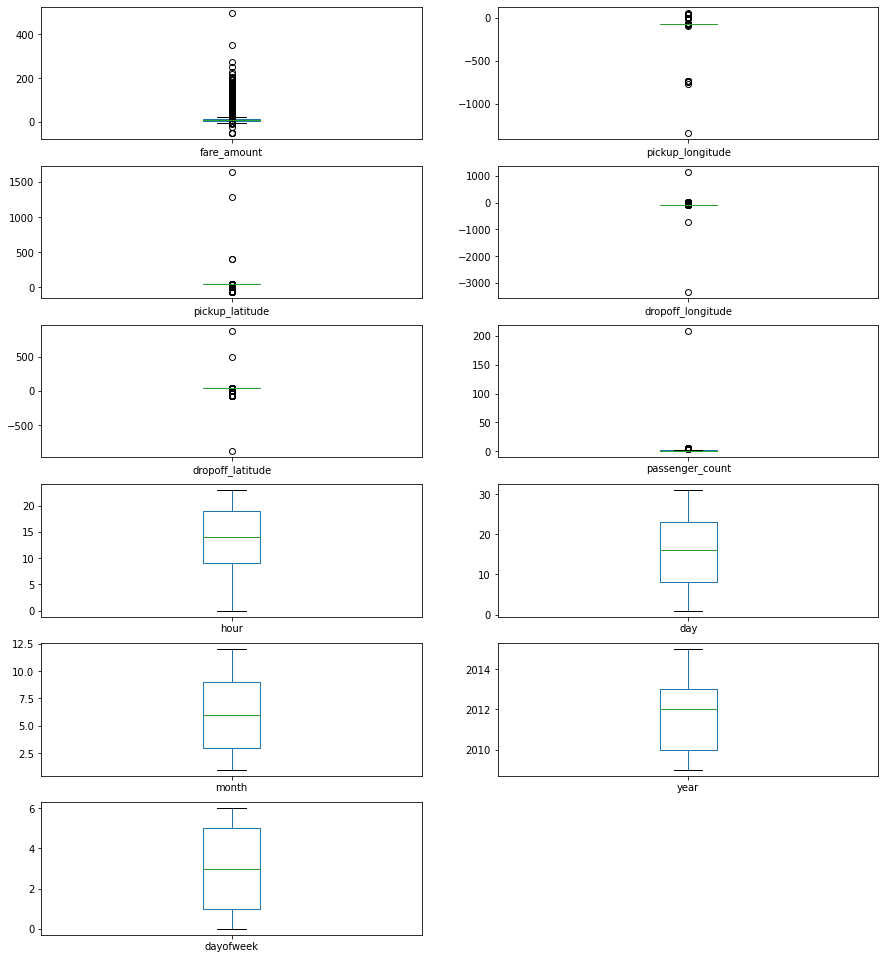

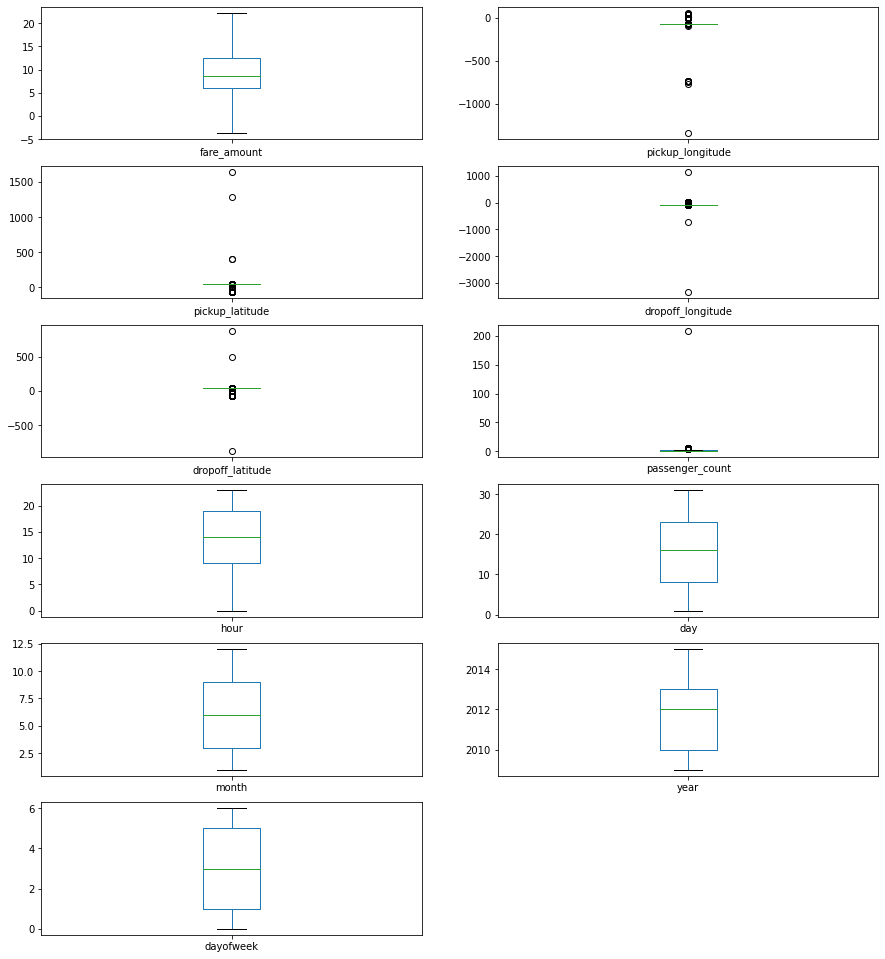

In [34]:
df.plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20))

#Box plot to check the outliers using the Inter Quartile Range to fill the values
def remove_outlier(df1,col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3-Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df[col] = np.clip(df1[col],lower_whisker,upper_whisker)
    return df1

def treat_outliers_all(df1,col_list):
    for c in col_list:
        df1 = remove_outlier(df,c)
        return df1

df = treat_outliers_all(df,df.iloc[:,0::])

#Box plot shows that dataset is free from outliers
df.plot(kind="box", subplots=True, layout=(7,2), figsize=(15,20))    

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_longitude   200000 non-null  float64
 2   pickup_latitude    200000 non-null  float64
 3   dropoff_longitude  200000 non-null  float64
 4   dropoff_latitude   200000 non-null  float64
 5   passenger_count    200000 non-null  int64  
 6   hour               200000 non-null  int64  
 7   day                200000 non-null  int64  
 8   month              200000 non-null  int64  
 9   year               200000 non-null  int64  
 10  dayofweek          200000 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 16.8 MB


In [36]:
# Finding incorrect latitude (less than or greater than 90) and longitude(greater than or less than 180)
incorrect_coordinates = df[(df["pickup_latitude"]>90) | (df["pickup_latitude"]<-90) | (df["dropoff_latitude"]>90) | (df["dropoff_latitude"]<-90) | 
                           (df["pickup_longitude"]>180) | (df["pickup_longitude"]<-180) | (df["dropoff_longitude"]>180) | (df["dropoff_longitude"]<-180)].index
df = df.drop(incorrect_coordinates)
df.reset_index(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199988 entries, 0 to 199987
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   index              199988 non-null  int64  
 1   fare_amount        199988 non-null  float64
 2   pickup_longitude   199988 non-null  float64
 3   pickup_latitude    199988 non-null  float64
 4   dropoff_longitude  199988 non-null  float64
 5   dropoff_latitude   199988 non-null  float64
 6   passenger_count    199988 non-null  int64  
 7   hour               199988 non-null  int64  
 8   day                199988 non-null  int64  
 9   month              199988 non-null  int64  
 10  year               199988 non-null  int64  
 11  dayofweek          199988 non-null  int64  
dtypes: float64(5), int64(7)
memory usage: 18.3 MB


In [37]:
# pip install haversine
import haversine as hs

# Calculate the distance using Haversine to calculate the distance between two points. 
# Can't use Eucladian as it is for flat surface.
travel_dist = []
for pos in range(len(df['pickup_longitude'])):
    long1, lati1, long2, lati2 = [df['pickup_longitude'][pos], df['pickup_latitude'][pos],
                                  df['dropoff_longitude'][pos], df['dropoff_latitude'][pos]]
    loc1 = (lati1, long1)
    loc2 = (lati2, long2)
    
    c = hs.haversine(loc1, loc2)
    travel_dist.append(c)

travel_dist_df = pd.DataFrame(travel_dist)
travel_dist_df.head()

,0
0,1.683325
1,2.457593
2,5.036384
3,1.661686
4,4.475456


Remaining observastions in the dataset : (199988, 13)


<AxesSubplot:>

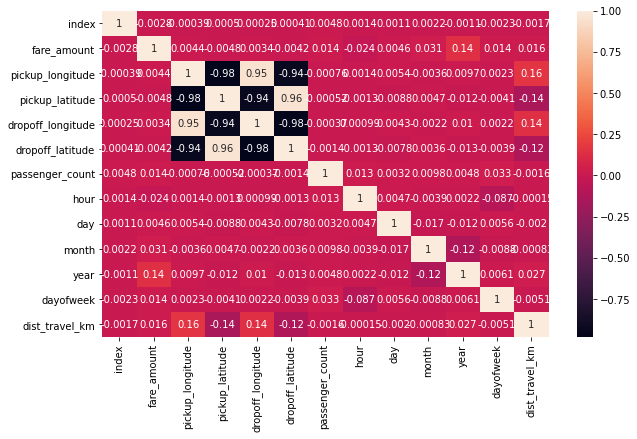

In [38]:
df['dist_travel_km'] = travel_dist_df

#Uber doesn't travel over 130kms so minimize the distance
df = df.loc[(df.dist_travel_km>=1)|(df.dist_travel_km<=130)]
print("Remaining observastions in the dataset :", df.shape)

fig, axis = plt.subplots(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)
#CorrelationHeatmap(Lightvaluesmeanshighlycorrelated)

In [39]:
X = df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','hour','day','month','year','dayofweek']]
y = df['fare_amount']

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.33)

In [41]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print("Intercept :", lin_reg.intercept_)             #To find the linear intercept
print("\nLinear Coefficients :", lin_reg.coef_)      #To find the linear coeeficient

print()
prediction = lin_reg.predict(X_test)                 #To predict the target values
print(prediction)
y_test

Intercept : -866.6253349861091

Linear Coefficients : [ 0.02049759  0.01717453 -0.02072598 -0.01788141  0.04647255 -0.02127874
  0.00320289  0.07717918  0.43557968  0.04157174]

[11.09232584  8.64220586  9.32662772 ... 10.13806634 11.10658495
 10.06148981]


173135    22.25
188974     7.30
131762    14.10
41288     22.25
113290     7.70
          ...  
12019      5.30
43582     10.10
89377      8.90
183127    11.00
192345     6.10
Name: fare_amount, Length: 65997, dtype: float64

In [42]:
from sklearn.metrics import r2_score
print("R2 Score :", r2_score(y_test, prediction))

from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,prediction)
RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)

R2 Score : 0.02153169388629772
RMSE : 5.365112106299092


In [43]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100) 
# Here, n_estimators means number of trees you want to build before making the prediction
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_pred

array([22.25  ,  7.66  , 12.758 , ..., 10.4   , 10.9445,  6.626 ])

In [44]:
R2_Random = r2_score(y_test,y_pred)
print("R2 Score :", R2_Random)

MSE_Random = mean_squared_error(y_test,y_pred)
RMSE_Random = np.sqrt(MSE_Random)
print("RMSE :", RMSE_Random)

R2 Score : 0.8103458952348048
RMSE : 2.362036166826693
